In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [85]:
file_path = '/Users/taliaveils/Documents/Data Analyst Project/Paris Olympic Medallists/Paris Olympic Medallists.csv'

# Load the file using an alternative encoding (ISO-8859-1)
df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

# Set custom headers
df.columns = ['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total']

# Save it with UTF-8 encoding
df.to_csv('cleaned_file.csv', index=False, encoding='utf-8')


In [86]:
# Remove special characters (like à, *, etc.) in the 'NOC' column
df['NOC'] = df['NOC'].str.replace('à', '', regex=True)
df['NOC'] = df['NOC'].str.replace(r'[^\w\s]', '', regex=True)

# Verify the changes
print(df['NOC'])

0            United States
1                    China
2                    Japan
3                Australia
4                   France
              ...         
87                   Qatar
88    Refugee Olympic Team
89               Singapore
90                Slovakia
91                  Zambia
Name: NOC, Length: 92, dtype: object


In [87]:
df

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64
...,...,...,...,...,...,...
87,87,Qatar,0,0,1,1
88,88,Refugee Olympic Team,0,0,1,1
89,89,Singapore,0,0,1,1
90,90,Slovakia,0,0,1,1


#### Explore the data
Get information about the data first

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    92 non-null     object
 1   NOC     92 non-null     object
 2   Gold    92 non-null     int64 
 3   Silver  92 non-null     int64 
 4   Bronze  92 non-null     int64 
 5   Total   92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [89]:
df.columns

Index(['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

Rename Column

In [90]:
(
    df[["Rank", "NOC", "Gold", "Silver", "Bronze", "Total"]]
    .rename(columns={"Total": "Total Medals"})
).head(5)


,Rank,NOC,Gold,Silver,Bronze,Total Medals
0,1,United States,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64


#### Research answer

Visualization Total medals of each country

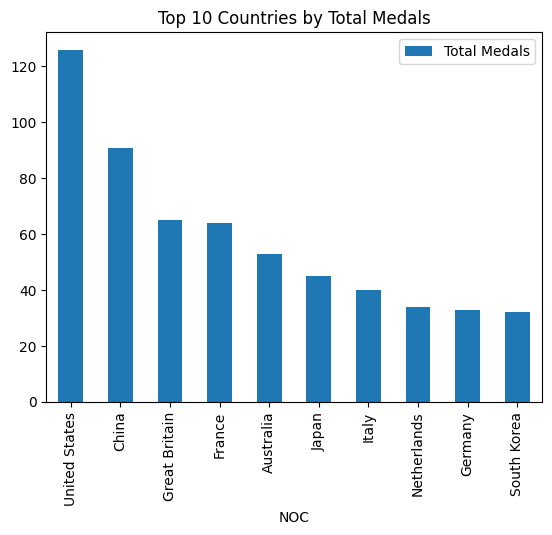

In [97]:
import matplotlib.pyplot as plt

top_10_countries = total_medals_by_country.head(10)
top_10_countries.plot(kind='bar', x='NOC', y='Total Medals', title='Top 10 Countries by Total Medals')
plt.show()

Total Medals

In [91]:
total_gold_medals = df['Gold'].sum()
total_gold_medals

329

In [92]:
total_silver_medals = df['Silver'].sum() 
total_silver_medals

330

In [93]:
total_bronze_medals = df['Bronze'].sum() 
total_bronze_medals

385

In [94]:
total_NOC = df['NOC'].count() 
total_NOC

92

Total Medals: Calculate the total number of gold, silver, and bronze medals for each country.

In [95]:
# Create Total Medals column if it doesn't exist
df['Total Medals'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)

In [96]:
# Calculate percentage of medals
df['Gold Percentage'] = (df['Gold'] / df['Total Medals']) * 100
df['Silver Percentage'] = (df['Silver'] / df['Total Medals']) * 100
df['Bronze Percentage'] = (df['Bronze'] / df['Total Medals']) * 100

In [97]:
# Handle division by zero, fill NaN values with 0
df['Gold Percentage'] = df['Gold Percentage'].fillna(0)
df['Silver Percentage'] = df['Silver Percentage'].fillna(0)
df['Bronze Percentage'] = df['Bronze Percentage'].fillna(0)

In [98]:
# Preview the dataframe with the new Percentage column
print(df[['NOC', 'Gold', 'Total Medals', 'Gold Percentage']].head())
print(df[['NOC', 'Silver', 'Total Medals', 'Silver Percentage']].head())
print(df[['NOC', 'Bronze', 'Total Medals', 'Bronze Percentage']].head())

             NOC  Gold  Total Medals  Gold Percentage
0  United States    40           126        31.746032
1          China    40            91        43.956044
2          Japan    20            45        44.444444
3      Australia    18            53        33.962264
4         France    16            64        25.000000
             NOC  Silver  Total Medals  Silver Percentage
0  United States      44           126          34.920635
1          China      27            91          29.670330
2          Japan      12            45          26.666667
3      Australia      19            53          35.849057
4         France      26            64          40.625000
             NOC  Bronze  Total Medals  Bronze Percentage
0  United States      42           126          33.333333
1          China      24            91          26.373626
2          Japan      13            45          28.888889
3      Australia      16            53          30.188679
4         France      22            64